<a href="https://colab.research.google.com/github/AI-odyssey/AI-odyssey.github.io/blob/master/ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression
선형회귀 - 종속 변수 y와 한개 이상의 독립변수 X와의 선형관계를 모델링하는 방법론

In [2]:
import sympy
import numpy

from matplotlib import pyplot
%matplotlib inline
sympy.init_printing()

In [ ]:
w = sympy.Symbol('w', real=True)

f = w**2 + 3*w - 5
f

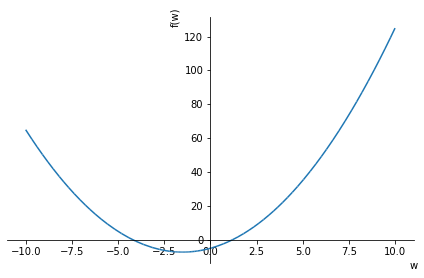

In [ ]:
sympy.plotting.plot(f);

In [ ]:
fprime = f.diff(w)
fprime

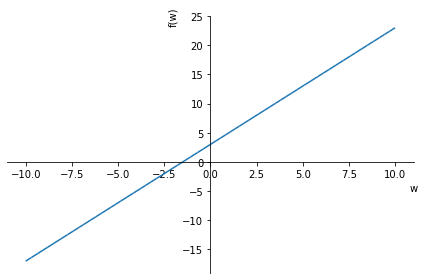

In [ ]:
sympy.plotting.plot(fprime);

In [ ]:
sympy.solve(fprime, w)

# Gradient Descent

In [ ]:
fpnum = sympy.lambdify(w, fprime)
type(fpnum)

function

In [ ]:
w = 10.0

for _ in range(1000):
  w = w - fpnum(w) *0.01

print(w)

-1.4999999806458753


# 데이터셋 만들어보기

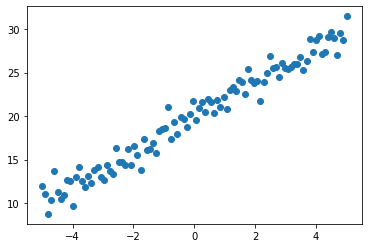

In [ ]:
x_data = numpy.linspace(-5, 5, 100)  #(시작점, 끝점, 점의 개수)
w_true = 2
b_true = 20

#y= wx+b 선분에 noise를 추가해서 출력(radom.normal 없으면 그냥 직선)
y_data = w_true*x_data + b_true + numpy.random.normal(size=len(x_data))
pyplot.scatter(x_data, y_data);

In [ ]:
x_data.shape

In [ ]:
y_data.shape

In [ ]:
w, b, x, y = sympy.symbols('w b x y')

cost_function = (w*x + b - y)**2
cost_function

In [ ]:
grad_b = sympy.lambdify([w,b,x,y], cost_function.diff(b), 'numpy')
grad_w = sympy.lambdify([w,b,x,y], cost_function.diff(w), 'numpy')

In [ ]:
w = 0 
b = 0

for _ in range(1000):
  descent_b = numpy.sum(grad_b(w,b,x_data,y_data))/len(x_data)
  descent_w = numpy.sum(grad_w(w,b,x_data,y_data))/len(x_data)
  w = w - descent_w*0.01
  b = b - descent_b*0.01

print(w)
print(b)


1.974233739486593
19.949641406595283


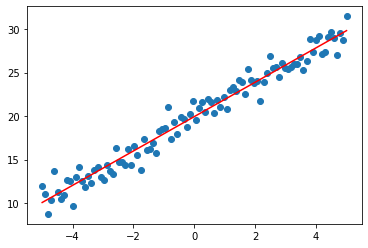

In [ ]:
pyplot.scatter(x_data,y_data)
pyplot.plot(x_data, w*x_data + b, 'r');

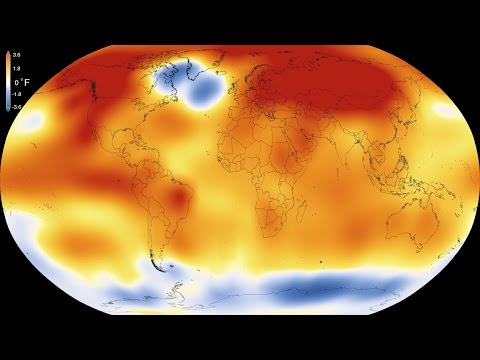

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('gGOzHVUQCw0')

In [3]:
from urllib.request import urlretrieve
URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'
urlretrieve(URL, 'land_global_temperature_anomaly-1880-2016.csv')

('land_global_temperature_anomaly-1880-2016.csv',
 <http.client.HTTPMessage at 0x7fd19b355050>)

In [4]:
import numpy

In [5]:
fname = '/content/land_global_temperature_anomaly-1880-2016.csv'

year, temp_anomaly = numpy.loadtxt(fname, delimiter=',', skiprows=5, unpack=True)

In [6]:
from matplotlib import pyplot
%matplotlib inline

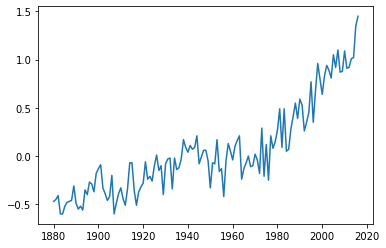

In [ ]:
pyplot.plot(year, temp_anomaly);

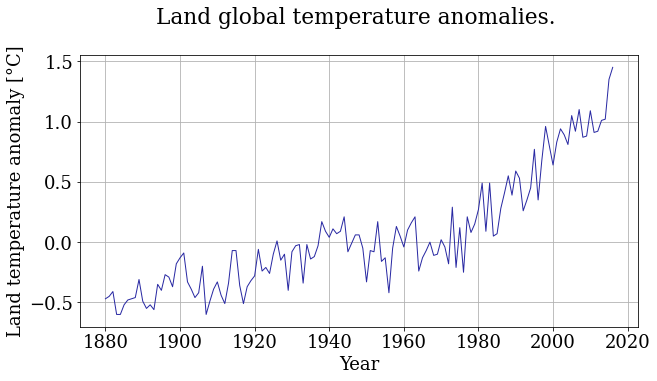

In [7]:
pyplot.rc('font', family='serif', size='18')

#You can set the size of the figure by doing:
pyplot.figure(figsize=(10,5))

#Plotting
pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1) 
pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid();

In [ ]:
w = numpy.sum(temp_anomaly*(year - year.mean())) / numpy.sum(year*(year - year.mean())) 
b = a_0 = temp_anomaly.mean() - w*year.mean()

print(w)
print(b)

0.01037028394347266
-20.148685384658464


In [ ]:
reg = b + w * year

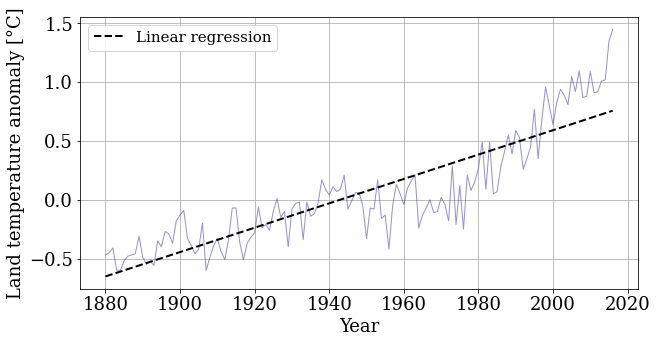

In [ ]:
pyplot.figure(figsize=(10, 5))

pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5) 
pyplot.plot(year, reg, 'k--', linewidth=2, label='Linear regression')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();

# 다음 과제 미리 보기 -> gradient descent로 풀기

In [9]:
import sympy

In [10]:
w, b, x, y = sympy.symbols('w b x y')

cost_function = (w*x + b - y)**2
cost_function     

In [11]:
grad_b = sympy.lambdify([w,b,x,y], cost_function.diff(b), 'numpy')
grad_w = sympy.lambdify([w,b,x,y], cost_function.diff(w), 'numpy')

In [12]:
#feature scaling 전 -> 오류남
w = 0
b = 0

for i in range(1000):
    descent_b = numpy.sum(grad_b(w,b,year,temp_anomaly))/len(year)
    descent_w = numpy.sum(grad_w(w,b,year,temp_anomaly))/len(year)
    w = w - descent_w*0.001 # with 0.01 the step size
    b = b - descent_b*0.001 

print(w)
print(b)

nan
nan


<string>:2: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [13]:
year_scaled = (year - year.mean())/year.std()
temp_anomaly_scaled = (temp_anomaly - temp_anomaly.mean()) / temp_anomaly.std()

In [14]:
w = 0
b = 0

for i in range(1000):
    descent_b = numpy.sum(grad_b(w,b,year_scaled,temp_anomaly_scaled))/len(year_scaled)
    descent_w = numpy.sum(grad_w(w,b,year_scaled,temp_anomaly_scaled))/len(year_scaled)
    w = w - descent_w*0.001 # with 0.01 the step size
    b = b - descent_b*0.001 

print(w)
print(b)

0.756766964479979
5.551763428541569e-17


In [15]:
reg = b + w * year_scaled

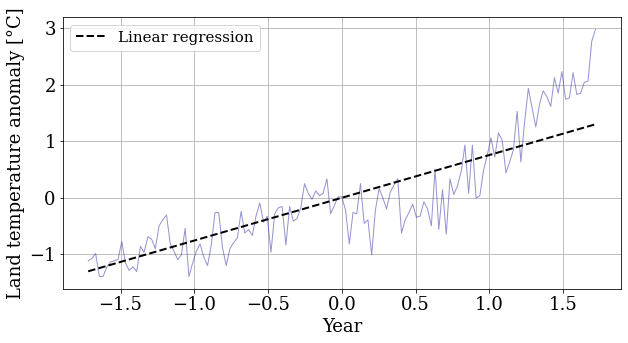

In [16]:
pyplot.figure(figsize=(10, 5))

pyplot.plot(year_scaled, temp_anomaly_scaled, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5) 
pyplot.plot(year_scaled, reg, 'k--', linewidth=2, label='Linear regression')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();